<a href="https://colab.research.google.com/github/SharonEstivalez/FisicaComputacional1/blob/master/Actividad_10/Actividad10_Sharon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***$$ACTIVIDAD  \space 10$$***



Pacheco Rodriguez Sharon Estivalez

In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


**Ejercicio 1:**

Resuelva la Ecuación del calor, usando el método anterior para el siguiente caso:

**Caso a)** 

Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$.
Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'


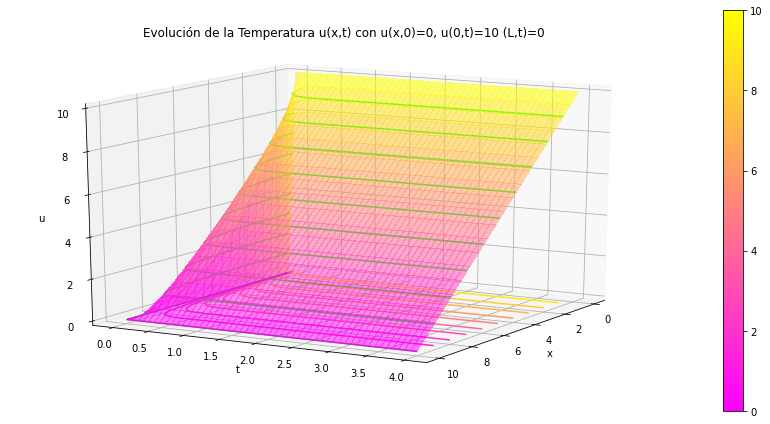

In [ ]:
# Pasos
M = 20 # En el espacio
N = 5000 # En el tiempo

# Intervalo en x=(a,b)
a = 0
b = 10

# Tiempo inicial y final
t0 = 0
tf = 4.0

deltax = (b-a)/(M-1)
deltat = (tf-t0)/(N-1)

x = np.linspace(a,b,M)
t = np.linspace(t0,tf,N)

kappa = 100 # Constante difusión del calor
alpha = kappa*deltat/deltax**2

# Para matriz de la sol
# LLenamos de ceros inicialmente
u = np.zeros((M,N))

# Condiciones
u[:,0] = np.zeros(x.shape)
u[0,:] = 10
u[-1,:] = 0

# Método diferencias finitas 
# En el tiempo
for i in range (0,N-1):
  # En el espacio
  for j in range (1,M-1):
    u[j,i+1] = alpha*u[j-1,i] + (1-2*alpha)*u[j,i] + alpha*u[j+1,i]

T,X = np.meshgrid(t,x)

fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,T,u,cmap='spring',linewidth=0.01,antialiased=False,alpha=0.5)

ax.contour(X,T,u,10,lw=1,colors='lime',linestyles='solid')
ax.contour(X,T,u,10,lw=1,cmap='spring',linestyles='solid',offset=0)

# Para escala de temperaturas
m = cm.ScalarMappable(cmap='spring')
m.set_array(u)
plt.colorbar(m)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=15,azim=30)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=0, u(0,t)=10 (L,t)=0')

plt.tight_layout()
plt.show()

**Caso b)** 

Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'


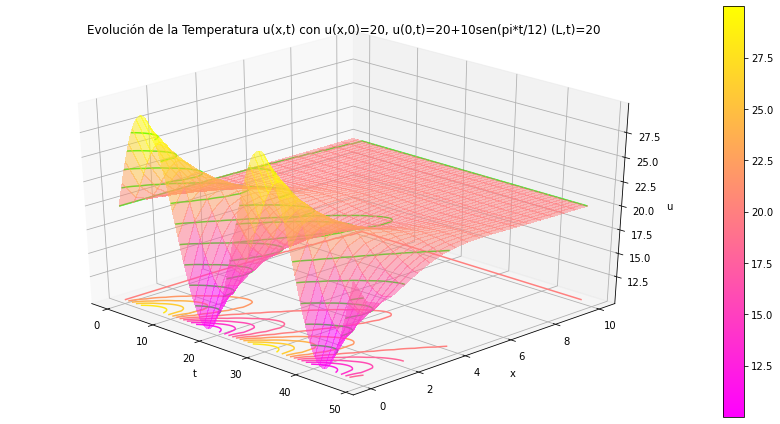

In [37]:
# Pasos
M = 20 # En el espacio
N = 5000 # En el tiempo

# Intervalo en x=(a,b)
a = 0
b = 10

# Tiempo inicial y final
t0 = 0
tf = 48.0

deltax = (b-a)/(M-1)
deltat = (tf-t0)/(N-1)

x = np.linspace(a,b,M)
t = np.linspace(t0,tf,N)

kappa = 0.25 # Constante difusión del calor
alpha = kappa*deltat/deltax**2

# Para matriz de la sol
# LLenamos de ceros inicialmente
u = np.zeros((M,N))

# Condiciones
u[:,0] = 20.0*np.ones(x.shape)
u[0,:] = 20 + 10*np.sin(np.pi*t/12)
u[-1,:] = 20

# Método diferencias finitas 
# En el tiempo
for i in range (0,N-1):
  # En el espacio
  for j in range (1,M-1):
    u[j,i+1] = alpha*u[j-1,i] + (1-2*alpha)*u[j,i] + alpha*u[j+1,i]

T,X = np.meshgrid(t,x)

fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T,X,u,cmap='spring',linewidth=0.01,antialiased=False,alpha=0.5)

ax.contour(T,X,u,10,lw=1,colors='lime',linestyles='solid')
ax.contour(T,X,u,10,lw=1,cmap='spring',linestyles='solid',offset=10)

# Para escala de temperaturas
m = cm.ScalarMappable(cmap='spring')
m.set_array(u)
plt.colorbar(m)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.view_init(elev=30,azim=-45)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=20, u(0,t)=20+10sen(pi*t/12) (L,t)=20')

plt.tight_layout()
plt.show()

**Problema 2:**

**Variaciones de la Temperatura en el Suelo**

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera. 

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\partial u/\partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como 

\begin{equation*}
u(0,t) = u_0 + u_a \sin (\frac{2\pi t}{P})
\end{equation*}

donde $u_0$ es la inical temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P=24 h=86,400 s$.

En este caso la constante de difusión de calor es $\kappa = 1.0 \times 10^{-6}$. El tiempo será medido en segundos. 

Usando la Ecuación de Calor, determina numéricamente  la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que $u_0=15ºC$, $u_a= 20ºC$.

Realiza una simulación de al menos 48 horas. 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'


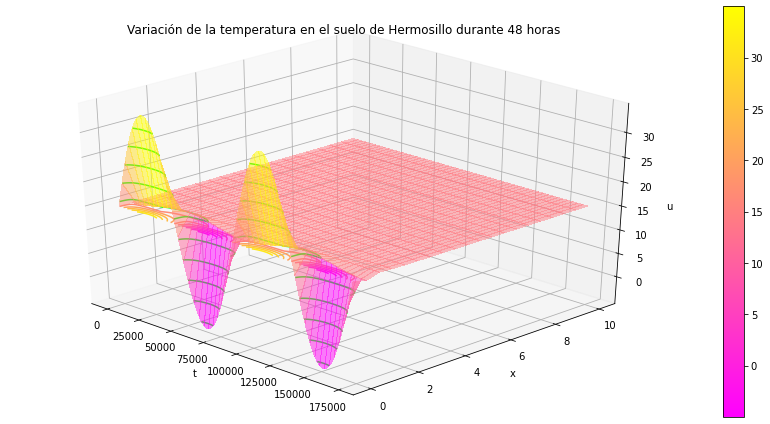

In [45]:
# Pasos
M = 20 # En el espacio
N = 5000 # En el tiempo

# Intervalo en x=(a,b)
a = 0
b = 10

# Tiempo inicial y final
t0 = 0
tf = 172800
P = 86400 #Periodo de variación diaria de temperatura (24h en segundos)
deltax = (b-a)/(M-1)
deltat = (tf-t0)/(N-1)

x = np.linspace(a,b,M)
t = np.linspace(t0,tf,N)

kappa = 1e-6 # Constante difusión del calor
alpha = kappa*deltat/deltax**2

# Para matriz de la sol
# LLenamos de ceros inicialmente
u = np.zeros((M,N))

# Condiciones
u[:,0] = 15*np.ones(x.shape)
u[0,:] = 15 + 20*np.sin(2*np.pi*t/P)
u[-1,:] = 15

# Método diferencias finitas 
# En el tiempo
for i in range (0,N-1):
  # En el espacio
  for j in range (1,M-1):
    u[j,i+1] = alpha*u[j-1,i] + (1-2*alpha)*u[j,i] + alpha*u[j+1,i]

T,X = np.meshgrid(t,x)

fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T,X,u,cmap='spring',linewidth=0.01,antialiased=False,alpha=0.5)

ax.contour(T,X,u,10,lw=1,colors='lime',linestyles='solid')
ax.contour(T,X,u,10,lw=1,cmap='spring',linestyles='solid',offset=15)

# Para escala de temperaturas
m = cm.ScalarMappable(cmap='spring')
m.set_array(u)
plt.colorbar(m)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.view_init(elev=30,azim=-45)
ax.set_title('Variación de la temperatura en el suelo de Hermosillo durante 48 horas')

plt.tight_layout()
plt.show()